![imagenes](logo.png)

# Polígonos de Sierpinski

Elige tu polígono regular favorito de $n$ lados. Numera sus vértices en dirección contraria a las manecillas del reloj. Comenzando con el 1, lanza un dado de $n$ caras. Dirígete al vértice que te haya indicado el dado pero colócate a $\frac{2}{3}$ de distancia desde el lugar en el que partiste. Repite este procedimiento. 

En la siguiente figura te mostramos como ejemplo un polígono de 6 lados: se lanza un dado y nos da 3 como resultado; caminamos desde el vértice 1 hasta el 3 pero solo $\frac{2}{3}$ de distancia; marcamos el punto y lanzamos un dado que dá como resultado 5; caminamos desde la posición actual hacia el vértice 5 pero solo $\frac{2}{3}$ de distancia; etcétera.\\

![imagenes](hexagonos.png)

Si realizas este juego *suficientes veces* y marcas cada punto, obtendrás el **polígono de Sierpinski**.

## Algoritmo en Python

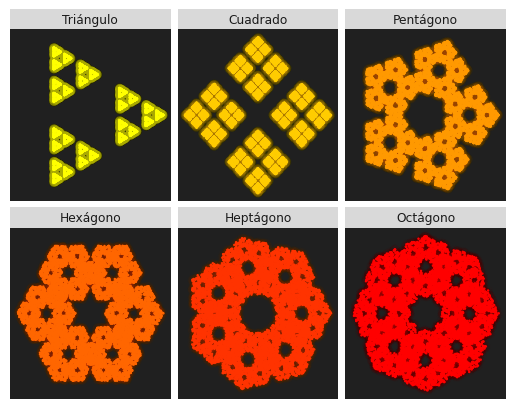

<ggplot: (-9223371881272203712)>

In [1]:
import pandas as pd
import numpy as np
import random as rd
from siuba import *
from plotnine import *

def constructor_poligono(N):
    poligono = (pd.DataFrame({"vertices":list(range(N))}) >>
                    mutate(vert_x=np.cos(2*np.pi*_.vertices/N),
                           vert_y=np.sin(2*np.pi*_.vertices/N)) >> 
                    select(-_.vertices))
    return poligono
    
def simulador(N):
    poligono = constructor_poligono(N)
    
    def seleccionador(u,v):
        vertice_futuro = poligono.iloc[rd.randint(0,N-1)]
        coor_x_futuro = (2*u/3 + vertice_futuro[0])/(5/3)
        coor_y_futuro = (2*v/3 + vertice_futuro[1])/(5/3)
        return [coor_x_futuro,coor_y_futuro]
        
    x0 = poligono["vert_x"].iloc[0]
    y0 = poligono["vert_y"].iloc[0]
    X = [x0]
    Y = [y0]
    n_vert = [N]
    
    for i in range(0,15000):
        vertice = seleccionador(X[i],Y[i])
        X.append(vertice[0])
        Y.append(vertice[1])
        n_vert.append(N)
    return pd.DataFrame({"X":X,"Y":Y,"n_vert":N})

nombres = (pd.DataFrame({"n_vert":[3,4,5,6,7,8],"nombre":["Triángulo","Cuadrado","Pentágono",
                                                         "Hexágono","Heptágono","Octágono"]})
          )

poligonos = (pd.concat([simulador(N) for N in range(3,9)]) >> 
    left_join(_,nombres,on = "n_vert") >> 
    mutate(nombre = _.nombre.astype("category").cat.reorder_categories(["Triángulo","Cuadrado","Pentágono",
                                                                        "Hexágono","Heptágono","Octágono"]))
            )
             
(ggplot() +
    geom_point(data = poligonos, mapping = aes(x="X",y="Y",color="n_vert"),size=3,alpha=0.01,show_legend = False) +
    geom_point(data = poligonos, mapping = aes(x="X",y="Y",color="n_vert"),size=0.01,show_legend = False) +
    scale_color_gradient(low = "yellow",
                      high = "red") + 
    theme(
    panel_background = element_rect("#202020"), 
    panel_grid = element_blank(),
    axis_title = element_blank(),
    axis_ticks = element_blank(),
    axis_text_x = element_blank(),
    axis_text_y = element_blank()) +
    facet_wrap("nombre")
)